In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
drugs = pd.read_csv('./Data_2019/drug_dt.csv')

In [84]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [85]:
drugs.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [86]:
drugs.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

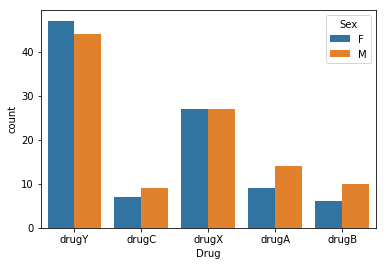

In [87]:
sns.countplot(x='Drug', hue='Sex', data=drugs)
plt.show()

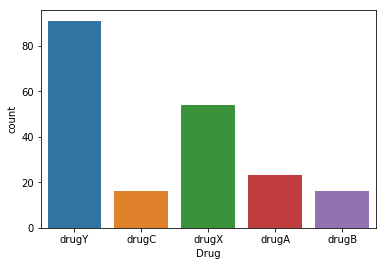

In [88]:
sns.countplot(x='Drug', data=drugs)
plt.show()

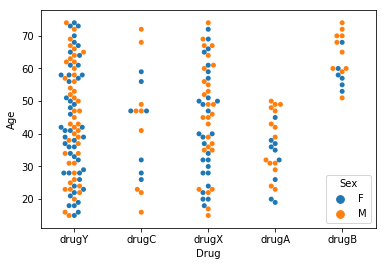

In [89]:
sns.swarmplot(x='Drug', y='Age', hue='Sex', data=drugs)

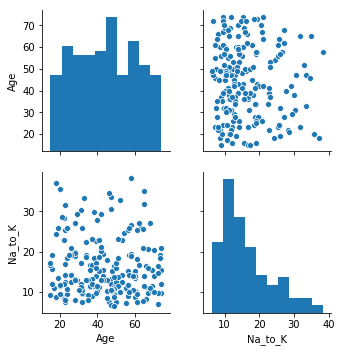

In [90]:
sns.pairplot(data=drugs)

# Split into features and Target

In [91]:
X = drugs.iloc[:, 0:5]
Y = drugs.iloc[:, 5]

In [92]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [93]:
Y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [94]:
X.Sex[X.Sex=='M'] = 0
X.Sex[X.Sex=='F'] = 1
X.BP[X.BP=='LOW'] = 0
X.BP[X.BP=='HIGH'] = 1
X.BP[X.BP=='NORMAL'] = 2
X.Cholesterol[X.Cholesterol=='HIGH'] = 0
X.Cholesterol[X.Cholesterol=='NORMAL'] = 1
X.Cholesterol[X.Cholesterol=='LOW'] = 2

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda/lib/pyth

In [95]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,1,0,25.355
1,47,0,0,0,13.093
2,47,0,0,0,10.114
3,28,1,2,0,7.798
4,61,1,0,0,18.043


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [99]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((150, 5), (50, 5), (150,), (50,))

# Train the Model

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [102]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
model.score(X_test, Y_test)

1.0

In [107]:
Ya = Y_test
Yp = model.predict(X_test)

# Analyze the Model

In [111]:
from sklearn.metrics import confusion_matrix, jaccard_similarity_score, accuracy_score, classification_report

In [109]:
'Accuracy : {}, Jaccard Similarity : {}'.format(accuracy_score(Ya, Yp), jaccard_similarity_score(Ya, Yp))

'Accuracy : 1.0, Jaccard Similarity : 1.0'

In [110]:
confusion_matrix(Ya, Yp)

array([[ 6,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 21]])

In [113]:
print(classification_report(Ya, Yp))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        21

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



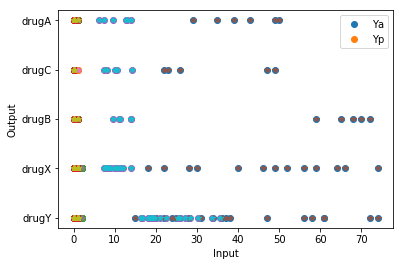

In [117]:
plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, Yp, '*')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(['Ya', 'Yp'])
plt.show()

In [118]:
table = pd.DataFrame({'Ya': Ya, 'Yp' : Yp})

In [120]:
CONMAT = pd.crosstab(table.Ya, table.Yp, rownames=['Actual'], colnames=['Predicted'], margins=True)
CONMAT

Predicted,drugA,drugB,drugC,drugX,drugY,All
Actual,,,,,,
drugA,6,0,0,0,0,6
drugB,0,5,0,0,0,5
drugC,0,0,5,0,0,5
drugX,0,0,0,13,0,13
drugY,0,0,0,0,21,21
All,6,5,5,13,21,50


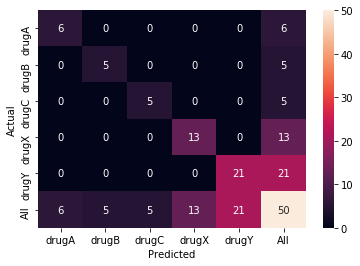

In [121]:
sns.heatmap(CONMAT, annot=True)

In [126]:
from sklearn.tree import export_graphviz

In [128]:
import pydotplus

In [156]:
dotdata = export_graphviz(model, filled=True, rounded=True, special_characters=True, label='all', impurity=True)

In [157]:
graph = pydotplus.graphviz.graph_from_dot_data(dotdata)

In [158]:
from IPython.display import display, SVG

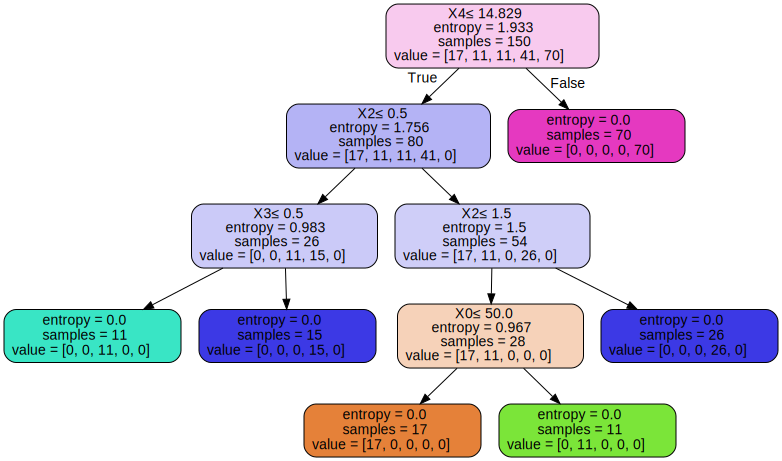

In [159]:
display(SVG(graph.create_svg()))

In [168]:
import pydotplus
from sklearn import tree
import numpy as np

In [172]:
filename = 'mytree.png'
featurename = drugs.columns[0:5]
targetname = drugs['Drug'].unique().tolist()

In [198]:
# dotfile
dotfile = tree.export_graphviz(model, feature_names=featurename, class_names=np.unique(Y), filled=True, rotate=False, rounded=True)

In [199]:
graph = pydotplus.graphviz.graph_from_dot_data(dotfile)

In [200]:
graph.write_png(filename)

True

In [201]:
from scipy import misc

In [202]:
image = misc.imread(filename)

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(-0.5, 1042.5, 735.5, -0.5)

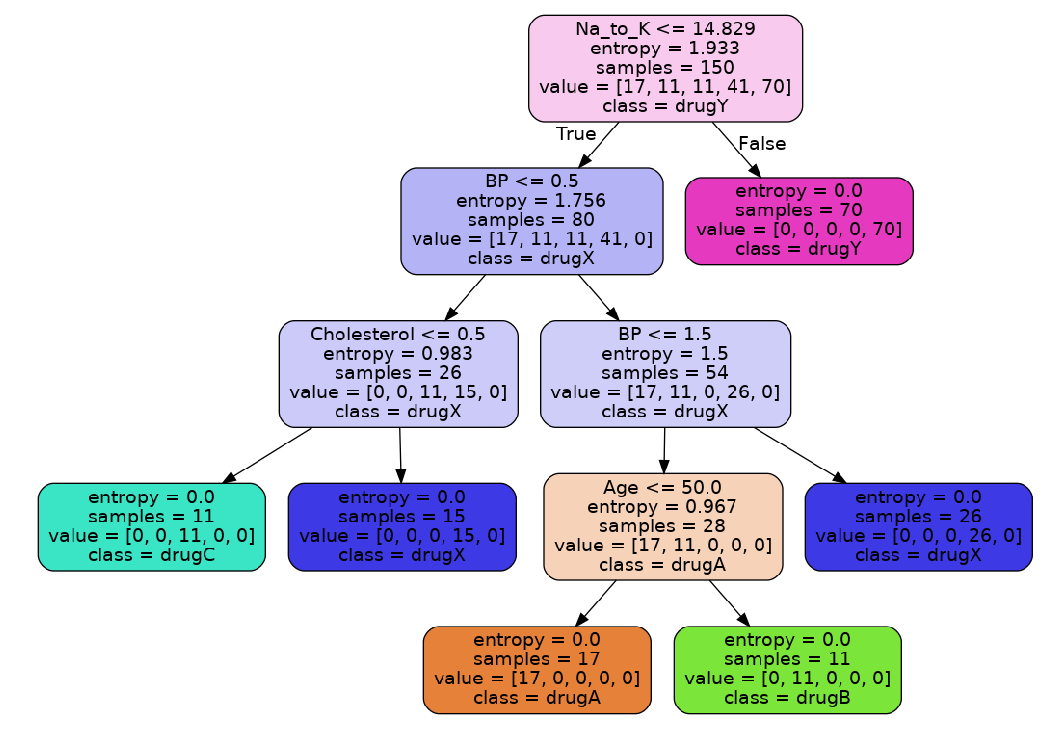

In [208]:
plt.figure(figsize=(18, 14))
plt.imshow(image)
plt.axis('off')

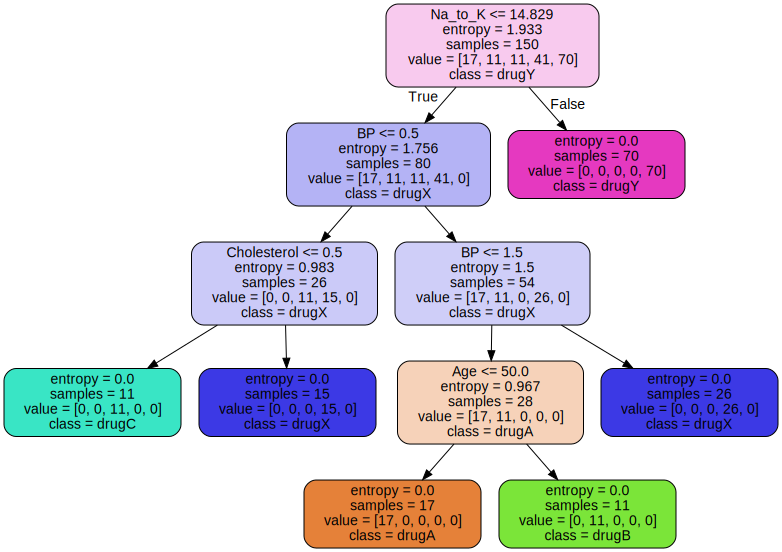

In [209]:
display(SVG(graph.create_svg()))